# Market Basket Analysis

The objective of this notebook is to conduct a simple and educational analysis of the Market Basket Analysis dataset. This dataset is imported from Kaggle and has the following characteristics:

## Dataset Description

- **File name**: Assignment-1_Data
- **File format**: .xlsx
- **Number of Rows**: 522065
- **Number of Attributes**: 7

The attributes are as follows:


1. **TransactionID**: A 6-digit number assigned to each transaction. This is a nominal attribute.
2. **ProductName**: The product name. This is a nominal attribute.
3. **ProductQuantity**: The quantities of each product per transaction. This is a numeric attribute.
4. **TransactionDate**: The day and time when each transaction was generated. This is a numeric attribute.
5. **ProductPrice**: The product price. This is a numeric attribute.
6. **CustomerID**: A 5-digit number assigned to each customer. This is a nominal attribute.
7. **CustomerCountry**: The name of the country where each customer resides. This is a nominal attribute.


## Project Objective

The primary objective of the analysis is to uncover interesting patterns and insights about the dataset using the pandas library. The raw data is transformed into meaningful graphs that can provide valuable business insights, aid in decision-making processes, and reveal trends that may not be immediately apparent in the raw data.

## Personal Objective
This project serves as a way for me to further develop and refine my skills in MySQL, pandas, and Matplotlib. I look to enhance my technical abilities and proficiency in handling and visualizing large datasets.

## Importing the Libraries

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the Data

The first step was to import the data in MySQL and remove any missing values, then it was exported as a .csv file which will be imported into the notebook.

In [5]:
column_names = [
    "TransactionID",  # A 6-digit number assigned to each transaction
    "ProductName",    # The product name
    "ProductQuantity",  # The quantities of each product per transaction
    "TransactionDate",  # The day and time when each transaction was generated
    "ProductPrice",  # The product price
    "CustomerID",  # A 5-digit number assigned to each customer
    "CustomerCountry"  # The name of the country where each customer resides
]

df = pd.read_csv('clean_market_data.csv', names=column_names)

In [6]:
df.head()

,TransactionID,ProductName,ProductQuantity,TransactionDate,ProductPrice,CustomerID,CustomerCountry
1,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
2,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
3,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
4,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## Adding additional column

I added the following column to the DataFrame:

**TotalTransactionValue**: ProductQuantity x ProductPrice

In [8]:
df['TotalTransactionValue'] = df['ProductQuantity'] * df['ProductPrice']
df.head()

,TransactionID,ProductName,ProductQuantity,TransactionDate,ProductPrice,CustomerID,CustomerCountry,TotalTransactionValue
1,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
2,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
3,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
4,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## Top Items Bar Chart
Displays the frequency of the top N most frequently purchased items, providing a quick overview of the most popular items among all transactions.

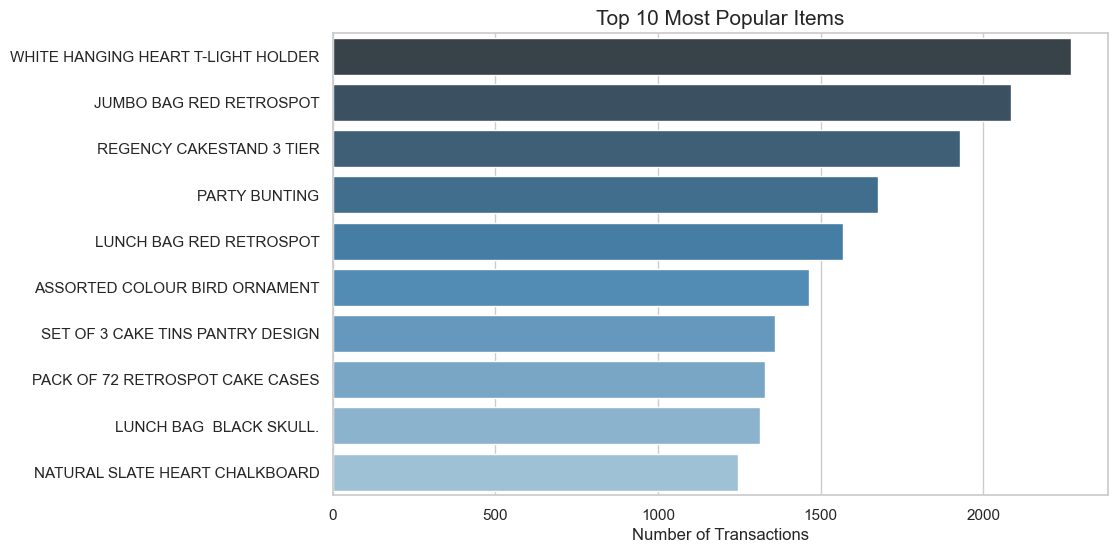

In [34]:
# Set the number of items to display
benchmark = 10

# Calculate the frequency of each item and take the top N items
top_items = df['ProductName'].value_counts()[:benchmark]

# Blue color palette with the same number of colors as items
palette = sns.color_palette("Blues_d", n_colors=benchmark)[::-1]

# Create the bar plot with the color palette
plt.figure(figsize=(10,6))
sns.barplot(y=top_items.index, x=top_items.values, orient='h', palette=palette)
plt.title(f'Top {benchmark} Most Popular Items', fontsize=15)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('')
plt.show()